## Importing Tensorflow and MNIST dataset

In [11]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the data so that it's easier for model to comprehend
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
import matplotlib.pyplot as plt

#plt.imshow(x_train[23])

#print(x_train[0])

## Setting Model Parameters and Training 

In [22]:
model = tf.keras.models.Sequential()

# To Flatten the data array of the input data from 2D to 1D
# This will be the input layer of the neural network
model.add(tf.keras.layers.Flatten())

# 256 neurons per layer dense layer 
# tf.nn.relu is the go to function , rectilinear due to its ease of use and ability to fit data
# activation functions are the functions that are responsible of the activation of a neuron
# eg- Sigmoid , Tanh, ReLU, leaky ReLu, Softmax

model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))

# Output layer, Softmax used as we want a Probability Distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 


# Optimizer and loss functions are used for back propogation , optimizer is used to compare the recieved and expected output
# while the loss function is a way to evaluate how well a neural network is performing 
# Loss - Function

# MSE(Mean Squared Error) -- MAE(Mean Absolute Error) -- Hubber loss -- For Regression Models
# Binary cross-entropy -- Categorical cross-entropy -- For Classification models 
# And the metric over whcih the model is evaluated is accuracy

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

# epoch = 3 defines the number of times the 
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.3116 - accuracy: 0.9063
Epoch 2/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.1288 - accuracy: 0.9604
Epoch 3/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.0925 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.0706 - accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.0572 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.0470 - accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0412 - accuracy: 0.9868
Epoch 8/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.0335 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.0294 - accuracy: 0.9898
Epoch 10/10
1875/1875 [==============================] - 2s 803u

In [24]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 636us/step - loss: 0.1252 - accuracy: 0.9677
0.12522919476032257 0.9677000045776367


## Saving Trained Model

In [15]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


INFO:tensorflow:Assets written to: num_reader.model\assets


In [16]:
new_model = tf.keras.models.load_model('num_reader.model')

In [17]:
predictions= new_model.predict([x_test])

313/313 [==============================] - 0s 609us/step


In [18]:
print(predictions)

[[5.9612859e-08 8.7428816e-08 4.5666227e-05 ... 9.9993181e-01
  4.8037680e-07 5.0511009e-08]
 [1.0840001e-09 1.0241974e-03 9.9894089e-01 ... 3.5258581e-06
  3.9575144e-07 6.5205857e-12]
 [9.4216035e-10 9.9978143e-01 1.7759265e-06 ... 1.3731584e-04
  3.3091761e-05 1.4899908e-06]
 ...
 [9.2649571e-10 8.9761215e-06 2.3861955e-07 ... 1.7004772e-04
  2.9160799e-06 1.3433555e-05]
 [1.1892035e-07 1.5524909e-05 1.6621003e-08 ... 3.2901273e-08
  6.1350432e-04 4.2636512e-07]
 [1.6259277e-05 3.3437086e-06 8.2426759e-06 ... 4.1508348e-09
  1.7519804e-06 5.7633631e-11]]


In [19]:
import numpy as np

## Example of Prediction Using Model

7


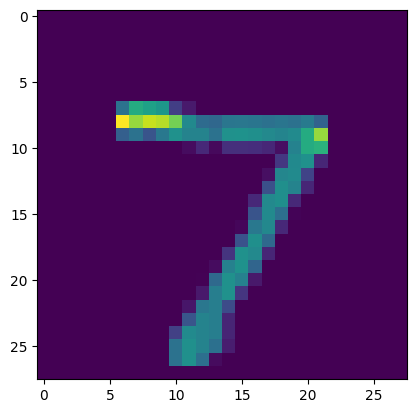

In [20]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()
